# 1. Boolean Masking

- To extract, modify, count, or manipulate values of an array with some given criteria, we use boolean masking.
- Whenever we perform any comaprison operation using unfucs or equivalent operators, we get a **boolean array.**

In [1]:
import numpy as np
import pandas as pd

seattle_raindata = pd.read_csv('Seattle2014.csv')
seattle_raindata.head()

,STATION,STATION_NAME,DATE,PRCP,SNWD,SNOW,TMAX,TMIN,AWND,WDF2,WDF5,WSF2,WSF5,WT01,WT05,WT02,WT03
0,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140101,0,0,0,72,33,12,340,310,36,40,-9999,-9999,-9999,-9999
1,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140102,41,0,0,106,61,32,190,200,94,116,-9999,-9999,-9999,-9999
2,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140103,15,0,0,89,28,26,30,50,63,72,1,-9999,-9999,-9999
3,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140104,0,0,0,78,6,27,40,40,45,58,1,-9999,-9999,-9999
4,GHCND:USW00024233,SEATTLE TACOMA INTERNATIONAL AIRPORT WA US,20140105,0,0,0,83,-5,37,10,10,67,76,-9999,-9999,-9999,-9999


- Rainfall in column 'PRCP'
- Its in mm, convert it to inches

In [2]:
# Read only precipitation in an array
rainfall = seattle_raindata['PRCP'].values
inches = rainfall/254   # FYI: Broadcasting example
inches.shape

(365,)

- The data is for full year, 365 days.

(array([245.,  14.,  13.,  17.,   8.,   6.,   5.,   6.,   4.,   3.,   7.,
          6.,   3.,   3.,   3.,   4.,   4.,   2.,   4.,   0.,   0.,   1.,
          1.,   1.,   0.,   0.,   0.,   2.,   1.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.        , 0.04596457, 0.09192913, 0.1378937 , 0.18385827,
        0.22982283, 0.2757874 , 0.32175197, 0.36771654, 0.4136811 ,
        0.45964567, 0.50561024, 0.5515748 , 0.59753937, 0.64350394,
        0.6894685 , 0.73543307, 0.78139764, 0.8273622 , 0.87332677,
        0.91929134, 0.96525591, 1.01122047, 1.05718504, 1.10314961,
        1.14911417, 1.19507874, 1.24104331, 1.28700787, 1.33297244,
        1.37893701, 1.42490157, 1.47086614, 1.51683071, 1.56279528,
        1.60875984, 1.65472441, 1.70068898, 1.74665354, 1.79261811,
        1.83858268]),
 <BarContainer object of 40 artists>)

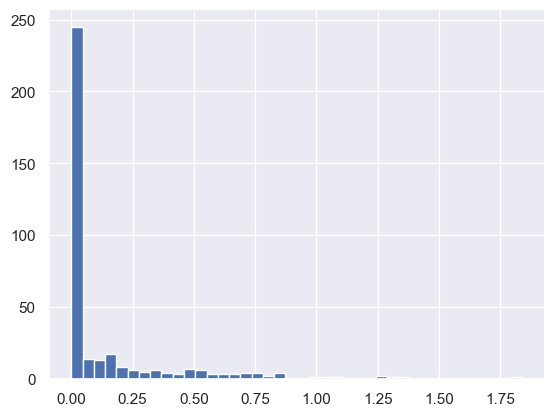

In [3]:
from matplotlib import pyplot as plt
import seaborn; seaborn.set_theme()  # set plt style

plt.hist(inches,bins=40)

- This histogram only shows us only that most of the days there was no rainfall in Seattle.
- But this is not enough to find other answers like:
  - How many days were rainy days?
  - What were avg precipitation on those rainy days?
  - How many days had rainfall more than a given criteria?
  
- To answer all these questions we will use element-wsie ufuncs of Numpy, as seen in ufuncs section.

# 2. Comparison Operators as ufuncs

- We can use comparison operators > and < as ufuncs. Same as other ufuncs like add-> + 
```python
        == → np.equal
        != → np.not_equal
        < → np.less
        <= → np.less_equal
        > → np.greater
        >= → np.greater_equal
```
- Whenever we perform such comparisons, Numpy gives boolean output i.e. True and False.


In [4]:
x = np.array([1,2,3,4,5])
x

array([1, 2, 3, 4, 5])

In [5]:
x<3

array([ True,  True, False, False, False])

In [6]:
x>3

array([False, False, False,  True,  True])

In [7]:
np.greater_equal(x, 3)

array([False, False,  True,  True,  True])

**Element by element comparison**
- In between two arrays, we can perform element by element comparison.


In [8]:
x*2 == x**2

array([False,  True, False, False, False])

**Two dimensional Example**
- Comaprison operators work on any size and shape of arrays.

In [9]:
np.random.seed(0)
multi_array = np.random.randint(10, size=(3,4))
multi_array

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [10]:
multi_array<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

# 3. Working with boolean array

- Once we get a boolean array, many operations can be performed on them.

In [11]:
rng = np.random.RandomState(0)  # set a seed

x = rng.randint(10, size=(3,4))
x


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

## (a) Counting values

### - np.count_nonzero

In [12]:
# 1. To Count true entries

#(a) 
np.count_nonzero(x<6)

8

### - np.sum()
- Can also be performed across axis.

In [13]:
#(b)
np.sum(x<6)

np.int64(8)

In [14]:
np.sum(x<6, axis =0)  # counts across columns, and collapses rows

array([2, 2, 2, 2])

In [15]:
np.sum(x==5, axis=1)  # Across rows

array([1, 1, 0])

### - np.any() and np.all()
- To check conditions.
- Can be used across any axis.

In [16]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [17]:
np.any(x>8)

np.True_

In [18]:
np.all(x<10)

np.True_

In [19]:
np.all(x<7, axis=0)

array([False, False, False,  True])

In [20]:
np.any(x<2, axis=1)

array([ True, False, False])

## (b) Boolean Operators
- To check compound conditions.
- We use pythons bitwise logic operators:  
``` python
        &,
        |,
        ^,
        ~
```
- Numpy applies these operators element wise on boolean arrays.

In [21]:
inches[:10]

array([0.        , 0.16141732, 0.05905512, 0.        , 0.        ,
       0.01181102, 0.48031496, 0.38188976, 0.22834646, 0.16929134])

In [22]:
# Number of days with Rainfall between 0.5 to 1 inches
np.sum((inches>0.5) & (inches<1))  # Paranthesis are important for correct result

np.int64(29)

In [23]:
# Various combinations to get same result 
# A & B = ~ ( C | D)
sum(~((inches<=0.5) | (inches>=1)))

np.int64(29)

Let's answer our question using these tools.

In [24]:
# Number of days without rain
sum(inches==0)

np.int64(215)

In [25]:
# Number of days with rain
sum(inches>0)

np.int64(150)

In [26]:
# Rain with more than 0.5 inches
sum(inches>0.5)

np.int64(37)

In [27]:
# Rainy days with <0.2 inches
sum((inches<0.2) & (inches>0))

np.int64(75)

# 4. Boolean Arrays as Masks

- We can use boolean arrays as mask, to select a subset of dataset.

In [28]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [29]:
mask = x>6  # Will use as mask
mask

array([[False, False, False, False],
       [ True,  True, False, False],
       [False, False,  True, False]])

In [30]:
x[mask]  # subset x[x>6]

array([7, 9, 7])

- The masking of multidimensional array using boolean operation has resulted in a 1D array.
- We can use **boolean operators + masking operations + Aggregator functions** to get some results easily.
- For example:
  

In [31]:
inches.size  # len of data

365

In [32]:
# Mask for rainy days
rainy = inches>0


In [33]:
# Mask for summer days 
# From 21 june + 90 days is summer season in seattle
# 21 june is 172nd day
summer = (np.arange(365)-172>0) & (np.arange(365)-172 <90)


In [34]:
np.median(inches[rainy])  # Median precipiation on rainy days

np.float64(0.19488188976377951)

In [35]:
np.median(inches[summer])  # Median Precipitaion on summer days

np.float64(0.0)

In [36]:
np.max(inches[summer])  # Max precipitaion on summer days

np.float64(0.8503937007874016)

In [40]:
np.median(inches[rainy & ~summer])

np.float64(0.20078740157480315)

# 5. and/or vs &/|

- and/or meausres complete object's truth or falsehood
- & and | refers to each objects bits.

In python:
- All integers are boolean 1 excpet 0 is only 0.

In [12]:
# In Python using and/or

assert bool(1 and 0) == False
assert bool(26 and 1) == True
assert bool(0 and 46) == False
assert bool(34 or 1) == True
assert bool(0 or -1) == True


In [37]:
# In python using &/|
bin(10 & 90)  # Gives binary and operation result of two numbers

'0b1010'

In Numpy:
- & and | operators operate on each elements.
- and and or operates on entire object as a whole, thus when used between two arrays, it arises error.

In [45]:
import numpy as np
a = np.array([1,1,0,4], dtype=bool)
b = np.array([0,5,1,7], dtype = bool)

In [46]:
a

array([ True,  True, False,  True])

In [47]:
b

array([False,  True,  True,  True])

In [48]:
a and b  # Error

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [50]:
a & b # Operates on each element

array([False,  True, False,  True])